## Generating tap sounds

In [63]:
from scipy.io import wavfile as wav
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [2]:
def get_wav_mp3(mp3_file, wav_name):
    song = AudioSegment.from_mp3(mp3_file)
    new_song = song.export(wav_name, format="wav")
    #print("Exported file as: " + wav_name)
    return new_song
    
def get_wav_mp4(mp4_file, wav_name):
    song = AudioSegment.from_file(mp4_file, "mp4")
    new_song = song.export(wav_name, format="wav")
    #print("Exported file as: " + wav_name)
    return new_song

def build_list(artist, clip_number, length):
    i = 1
    artist_list = []
    while i <= length :
        name = artist + "/" + str(clip_number) + "/" +str(i) + ".wav"
        artist_list.append(name)
        i += 1
    return artist_list

def split_silence_chunks(wavfile, silence_length, threshold, file_names_list):
    sound_file = AudioSegment.from_wav(wavfile)
    audio_chunks = split_on_silence(sound_file, 
                        min_silence_len=silence_length,
                        silence_thresh=threshold)
    for i in range (len(audio_chunks)) :
        chunk = audio_chunks[i]
        chunk.export(file_names_list[i], format='wav')
    print("Exported " + str(len(audio_chunks)) + " files")

## Getting started with shuffles
(Source : https://www.youtube.com/watch?v=aJa3DYnAjqU )

In [3]:
get_wav_mp4('Shuffle/Shuffle.mp4', 'Shuffle/Shuffle.wav');

Manually extract the relevant clip. 
<br/>Set channel to 1 (mono).

In [4]:
song = AudioSegment.from_wav('Shuffle/Shuffle.wav')
song = song.set_channels(1)
start = 30 * 1000
end = 34 * 1000
three_shuffles = song[start:end]
three_shuffles.export('Shuffle/1/three_shuffles.wav', format="wav");

In [39]:
three_shuffles

Split up the audio into its components. This could also be done with split on silence. 
<br/> Split on time needs to be fixed. (Index error)

In [5]:
shuffle_1 = three_shuffles[:(three_shuffles.duration_seconds/3)*1000]
shuffle_2 = three_shuffles[(three_shuffles.duration_seconds/3)*1000:(three_shuffles.duration_seconds/3)*2000]
shuffle_3 = three_shuffles[(three_shuffles.duration_seconds/3)*2000:]

In [6]:
shuffle_1.export('Shuffle/1/1.wav', format="wav")
shuffle_2.export('Shuffle/1/2.wav', format="wav")
shuffle_3.export('Shuffle/1/3.wav', format="wav");

In [7]:
shuffle_1

In [8]:
shuffle_2

In [9]:
shuffle_3

In [10]:
shuffle_1 * 3

## Now with ball change
(Source: https://www.youtube.com/watch?v=hi0wkLqPGR0 )

In [11]:
get_wav_mp4('Ball_change/Ball_change.mp4', 'Ball_change/Ball_change.wav');

Manually extract the relevant clip. 
<br/>Set channel to 1 (mono).

In [12]:
song = AudioSegment.from_wav('Ball_change/Ball_change.wav')
song = song.set_channels(1)
start = 48.5 * 1000
end = 52 * 1000
three_ball_changes = song[start:end]
three_ball_changes.export('Ball_change/1/three_ball_changes.wav', format="wav");

In [13]:
three_ball_changes

In [14]:
ball_change_1 = three_ball_changes[:(three_ball_changes.duration_seconds/3)*1000]
ball_change_2 = three_ball_changes[(three_ball_changes.duration_seconds/3)*1000:(three_ball_changes.duration_seconds/3)*2000]
ball_change_3 = three_ball_changes[(three_ball_changes.duration_seconds/3)*2000:]

In [15]:
ball_change_1.export('Ball_change/1/1.wav', format="wav")
ball_change_2.export('Ball_change/1/2.wav', format="wav")
ball_change_3.export('Ball_change/1/3.wav', format="wav");

## Generating a combination

In [16]:
combi_1 = (shuffle_1 + ball_change_1) * 2 + (shuffle_1 + (ball_change_1 * 3))
combi_1.export('Combi/1.wav', format='wav');
#(shuffle_1*20).speedup(playback_speed=2.5, crossfade=0)

In [17]:
combi_2 = shuffle_2 * 4 + ball_change_2 * 4
combi_2.export('Combi/2.wav', format='wav');

In [18]:
combi_3 = combi_1 + combi_2
combi_3.export('Combi/3.wav', format='wav');

In [19]:
combi_3

In [20]:
combi_basic = shuffle_1 + ball_change_1
combi_basic.export('Combi/Basic.wav', format='wav');

## Splitting up combination on silence
This could be a good strategy for processing generated data
<br/> Note the loudness in the samples
<br/> Chose reasonably large list size, too big is OK, too small is a problem
<br/> Minimum amount of silence to make a split is 250 msec

In [21]:
combi_3.dBFS

-40.34278762340235

In [22]:
split_silence_chunks('Combi/1.wav', 250, -42, build_list(artist='Combi/Chunks', clip_number=1, length=16))

Exported 8 files


In [23]:
split_silence_chunks('Combi/2.wav', 250, -42, build_list(artist='Combi/Chunks', clip_number=2, length=16))

Exported 8 files


In [24]:
split_silence_chunks('Combi/3.wav', 250, -42, build_list(artist='Combi/Chunks', clip_number=3, length=16))

Exported 16 files


In [25]:
split_silence_chunks('Combi/Basic.wav', 250, -42, build_list(artist='Combi/Chunks', clip_number='Basic', length=16))

Exported 2 files


## Visualizing the audio data

In [26]:
def plot_waves (file, title):
    # Read the wav file (mono)
    samplingFrequency, signalData = wav.read(file)
    
    # Plot the signal read from wav file
    plt.subplot(211)
    plt.title(title)
    #plt.plot(signalData[:,1])
    plt.plot(signalData[:])
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.subplot(212)
    #plt.specgram(signalData[:,1],Fs=samplingFrequency)
    plt.specgram(signalData[:],Fs=samplingFrequency)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    return plt.show()

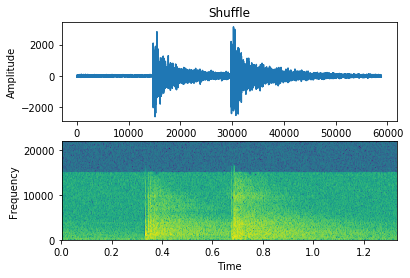

In [27]:
plot_waves('Shuffle/1/3.wav', 'Shuffle')

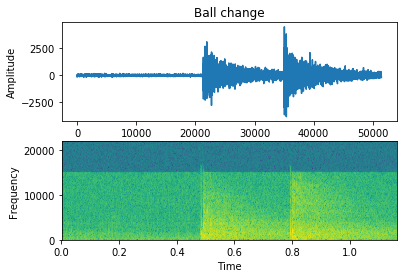

In [28]:
plot_waves('Ball_change/1/3.wav', 'Ball change')

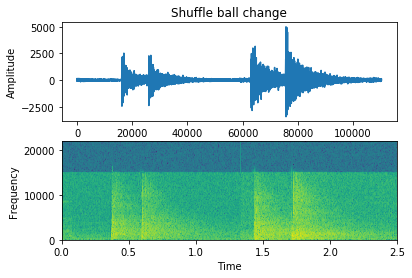

In [29]:
plot_waves('Combi/Basic.wav', 'Shuffle ball change')

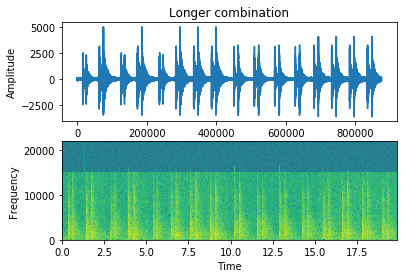

In [30]:
plot_waves('Combi/3.wav', 'Longer combination')

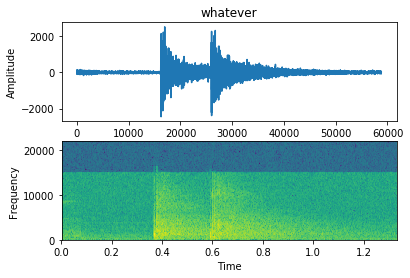

In [44]:
plot_waves('Shuffle/1/1.wav', 'whatever')

In [56]:
shuffle_1.duration_seconds * shuffle_1.frame_rate

58800.0

In [52]:
len(shuffle_1.get_array_of_samples())

58800

In [75]:
numbers = np.array(shuffle_1.get_array_of_samples())
df = pd.DataFrame(numbers)
df.describe()

,0
count,58800.000000
mean,-0.542364
std,190.590734
min,-2446.000000
25%,-42.000000
50%,-1.000000
75%,40.000000
max,2520.000000


In [79]:
numbers_2 = np.array(ball_change_1.get_array_of_samples())
df_2 = pd.DataFrame(numbers_2)
df_2.describe()

,0
count,51450.000000
mean,-0.044684
std,407.823338
min,-3433.000000
25%,-109.000000
50%,-1.000000
75%,103.000000
max,4986.000000


## Organizing audio clips in a DataFrame

In [31]:
from pathlib import Path
path_col = []

I'm doing this 3 times, changing the path for each folder (Shuffle/1, Ball_change/1, Combi).
<br/> Hopefully, I'll find a more elegant solution.

In [32]:
pathlist = Path('Shuffle/1').glob('**/*.wav')
for path in pathlist:
    path_col.append(path)

In [33]:
pathlist = Path('Ball_change/1').glob('**/*.wav')
for path in pathlist:
    path_col.append(path)

In [34]:
pathlist = Path('Combi').glob('**/*.wav')
for path in pathlist:
    path_col.append(path)

In [35]:
tap = pd.DataFrame({'Path':path_col})

Set all clips to 'mono': **handled when initial wav files are loaded**

Pimp out DataFrame with other relevant details
<br/> Single line loops 'cause I'm a *gangsta*!

In [36]:
tap['Length'] = [AudioSegment.from_wav(str(tap.loc[idx, 'Path'])).duration_seconds for idx in range(len(tap))] 
tap['Channels'] = [AudioSegment.from_wav(str(tap.loc[idx, 'Path'])).channels for idx in range(len(tap))]
tap['Sample_rate'] = [AudioSegment.from_wav(str(tap.loc[idx, 'Path'])).frame_rate for idx in range(len(tap))]
tap['Bit_depth'] = [AudioSegment.from_wav(str(tap.loc[idx, 'Path'])).sample_width*8 for idx in range(len(tap))]

In [37]:
tap

,Path,Length,Channels,Sample_rate,Bit_depth
0,Shuffle/1/three_shuffles.wav,4.000000,1,44100,16
1,Shuffle/1/1.wav,1.333333,1,44100,16
2,Shuffle/1/3.wav,1.333333,1,44100,16
3,Shuffle/1/2.wav,1.333333,1,44100,16
4,Ball_change/1/three_ball_changes.wav,3.500000,1,44100,16
5,Ball_change/1/1.wav,1.166667,1,44100,16
6,Ball_change/1/3.wav,1.166667,1,44100,16
7,Ball_change/1/2.wav,1.166667,1,44100,16
8,Combi/1.wav,9.833333,1,44100,16
9,Combi/Basic.wav,2.500000,1,44100,16


## Stolen code to test out

In [38]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
%matplotlib inline

def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        raw_sounds.append(X)
    return raw_sounds

def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 1: Waveplot",x=0.5, y=0.915,fontsize=18)
    plt.show()
    
def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 2: Spectrogram",x=0.5, y=0.915,fontsize=18)
    plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 3: Log power spectrogram",x=0.5, y=0.915,fontsize=18)
    plt.show()

#sound_file_paths = ["57320-0-0-7.wav","24074-1-0-3.wav","15564-2-0-1.wav","31323-3-0-1.wav",
#"46669-4-0-35.wav","89948-5-0-0.wav","40722-8-0-4.wav",
#"103074-7-3-2.wav","106905-8-0-0.wav","108041-9-0-4.wav"]
#
#sound_names = ["air conditioner","car horn","children playing",
#"dog bark","drilling","engine idling", "gun shot",
#"jackhammer","siren","street music"]
#
#raw_sounds = load_sound_files(sound_file_paths)
#
#plot_waves(sound_names,raw_sounds)
#plot_specgram(sound_names,raw_sounds)
#plot_log_power_specgram(sound_names,raw_sounds)

ModuleNotFoundError: No module named 'librosa'